Преобразование изображений:


1.   ЧБ формат;
2.   Очистка от шумов;
3.   Обрез по контуру клетки.



Загрузка данных из google drive 

In [ ]:
from tensorflow import keras
import cv2
import numpy
from PIL import Image, ImageEnhance
import os
from scipy import ndimage

In [ ]:
def grey_scale(img):
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  retGl, thGlobal = cv2.threshold(imgGray, 175, 250, cv2.THRESH_BINARY)
  return thGlobal

def clean(img):
  clean = cv2.bilateralFilter(img, 9, 75, 75)
  return img

def bright_enhance(img):
  enhancer = ImageEnhance.Brightness(img)
  img = enhancer.enhance(1.5)
  return img

def convert_format(pil_image):
    numpy_image = numpy.array(pil_image)  
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR) 
    return opencv_image

In [ ]:
def process_data(img):
  img = bright_enhance(img)

  img = convert_format(img)
  img = grey_scale(img)
  img = clean(img)

  return img  

In [ ]:
def Square(img):
    img = img.resize((1024,1024))
    return img

In [ ]:
def turn_img(image, k):
  rotated = ndimage.rotate(image, k*10, reshape=False, mode='nearest')
  return rotated

In [ ]:
def main(old_dir, new_dir, img_class):
  #Счётчик
  h = 0
  for filename in os.listdir(old_dir):
    img = Image.open(old_dir + '/' + filename)
    new_name = filename.split(".jpg")
    img = Square(img)   
    img = process_data(img)
    for ang in range(36):
      new_img = img.copy() 
      new_img = turn_img(new_img, ang)
      cv2.imwrite(new_dir + '/' + img_class + str(h) + '_' + str(ang) + '.jpg', new_img)
    h += 1

In [ ]:
main('/content/drive/MyDrive/data/not_onco', '/content/drive/MyDrive/changed_data/not_onco', 'not_onco')
main('/content/drive/MyDrive/data/onco', '/content/drive/MyDrive/changed_data/onco', 'onco')

In [ ]:
data_dir = '/content/drive/MyDrive/changed_data'

train_dataset = keras.preprocessing.image_dataset_from_directory(
    data_dir, subset='training', seed=42, validation_split=0.2, batch_size=20, image_size=(256, 256)
)

Found 17136 files belonging to 2 classes.
Using 13709 files for training.


In [ ]:
val_dataset = keras.preprocessing.image_dataset_from_directory(
    data_dir, subset='validation', seed=42, validation_split=0.2, batch_size=20, image_size=(256, 256)
)

Found 17136 files belonging to 2 classes.
Using 3427 files for validation.


Показ того, что данные загрузились

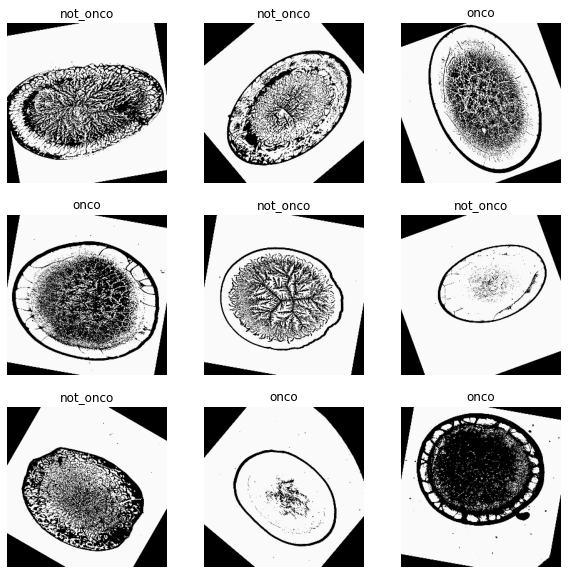

In [ ]:
import matplotlib.pyplot as plt
 
class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")